# Atticus Soane
# Backward Time Difference (Implicit)
# Problem 1
For the initial-boundary value problem $$u_{t} = \sigma u_{xx} \:\: 0\lt x \lt \pi$$ $$\sigma \gt 0, \: u(0,t) = u(\pi, t) = 0$$

and $$ u_{0}(x) = \begin{cases} x & 0 \leq x \leq \frac{\pi}{2} \\ \pi - x & \frac{\pi}{2} \leq x \leq \pi \end{cases} $$

# Part a)
Use separation of variables to find the exact solution. 

To begin, we assume that $U(t, x)$ can be written in terms of a function of $t$ and a function of $x$, yielding $U(t, x) = T(t)X(x)$. As we know that $U_{t} = \sigma U_{xx}$, by differentiating $U(t, x)$ with respect to $t$ we see that  $$T'X = \sigma X''T $$ Dividing both sides by $\sigma XT$ yields: $$\frac{T'}{\sigma T} = \frac{X''}{X}$$ The only way a function of only $t$ can equal a function of only $x$ is if they are both equal to a constant (which must be negative otherwise the solution would increase exponentially), and thus we can set both sides of this equation equal to $-\lambda^{2}$ Beginning with the right hand side: $$\frac{X''}{X} = -\lambda^{2} \implies X'' = -\lambda^{2}X$$ The solution to this differential equation is $$X(x) = Acos(\lambda x) + Bsin(\lambda x)$$ Using the boundary conditon that $X(0) = 0$ and $X(\pi) = 0$, we see that $$X(0)= 0 = Acos(0) + Bsin(0) \implies A=0$$ $$X(\pi)= 0 = Bsin(\lambda \pi) \implies \lambda = m, \: m \in \mathbb{Z}$$ Given that we know $\lambda$ can be written as an integer $m$, we see from the other side of the separated equation: $$\frac{T'}{\sigma T} = -m^{2} \implies T' = -m^{2}\sigma T$$ The solution to this differential equation is $$T(t) = ce^{-m^{2}\sigma t}$$ Thus, we conclude that $$U(t,x) = \displaystyle\sum_{m=1}^{\infty} B_{m}e^{-m^{2}\sigma t}sin(mx)$$ We can then use the initial condition to find an expression for $B_{m}$, by plugging in $0$ for $t$, the $e^{-m^{2}\sigma t}$ becomes $1$: $$U(0, x) = \displaystyle\sum_{m=1}^{\infty} B_{m}sin(mx) = \: u_{0}(x)$$ As $u_{0}(x)$ is given, $B_{m}$ can be defined as $$B_{m} = \frac{2}{\pi}\int_{0}^{\frac{\pi}{2}}xsin(mx)dx + \frac{2}{\pi}\int_{\frac{\pi}{2}}^{\pi} (\pi - x)sin(mx)dx$$ And this yields the final solution: $$U(t, x) = \displaystyle\sum_{m=1}^{\infty} B_{m}e^{-m^{2}\sigma t}sin(mx), \: B_{m} = \frac{2}{\pi}\int_{0}^{\frac{\pi}{2}}xsin(mx)dx + \frac{2}{\pi}\int_{\frac{\pi}{2}}^{\pi} (\pi - x)sin(mx)dx$$

# Part b)
Implement the explicit finite difference scheme $$\frac{u_{j}^{n+1} - u_{j}^{n}}{k} = \sigma \frac{u_{j-1}^{n} - 2u_{j}^{n} + u^{n}_{j+1}}{h^{2}}$$

In order to implement this scheme, we will rewrite it as $$U_{j}^{n+1} = U_{j}^{n} + \alpha [U_{j+1}^{n} - 2U_{j}^{n} + U_{j-1}^{n}], \: \alpha = \frac{\sigma k}{h^{2}}$$

In [1]:
#code written by Atticus Soane to implement the explicit finite difference scheme above
import numpy as np
import matplotlib.pyplot as plt
#this function represents the initial condition given in the problem. It takes the the value of x as the input, and 
#returns u_0(x) as the output
def I(x):
    if 0 <= x <= np.pi/2:
        return(x)
    else:
        return(np.pi - x)
#this function carries out the method. As inputs, it takes T, the upper bound for the range of time steps, L, the 
#upper bound for the x-values which in our case is always pi, I, the function that represents the initial condition
#given in the problem, M, which represents the number of spatial nodes taken in our range of x-values, and N, which
#represents the number of time steps. The function produces four outputs: u, which is the approximation to the 
#derivative at T, k, which is the distance between time steps, h, which is the distance between spatial nodes, and 
#lastly x, which is just the range of x-nodes used so that I can then plot the results. I am producing values for 
#k and h in the code mainly because L is an irrational number, and thus does not break evenly into equispaced nodes
#and I cannot calculate alpha without generating these numbers via the np.linspace command. I could have just returned
#alpha, but when determing the different values of M and N to use, I found it more useful to see what k and h actually
#were
def finiteDif1(T, L, I, M, N, sigma):
    x = np.linspace(0, L, M) #generates equispaced nodes for x-values
    h = x[1] - x[0] #calculates h value
    t = np.linspace(0, T, N) #generates equispaced time steps 
    k = t[1] - t[0] #calculates k value
    alpha = sigma * k / h**2 #generates alpha
    u0 = np.zeros(M) #a list of zeros to act as the initial condition (represents u^(n))
    u = np.zeros(M) #a list of zeros to act as the next time step (represents u^(n+1))
    for i in range(1, M): #performs the given function to represent the initial condition
        u0[i] = I(x[i])
    for j in range(N): #double loop, generating approximations for u^(n+1) given u^(n)
        for i in range(1, M-1):
            u[i] = u0[i] + alpha * (u0[i-1] - 2*u0[i] + u0[i+1])
        u0[:] = u #updates u^(n) to then generate the next u^(n+1)
    return(u, k, h, x)
    
    
    


In the code cell below, I generate three different approximations at three different times: $T = 0.1, 0.5, 1.0$, and increased the number of time steps linearly with respect to $T$ thus to keep $\alpha \leq \frac{1}{2}$ which is the condition for stability. The result, seen below, is three smooth curves approximating $U_{t}$ at three different time steps. 

In [2]:
u, k, h, x = finiteDif1(0.1, np.pi, I, 50, 50, 1)
u2, k2, h2, x2 = finiteDif1(0.5, np.pi, I, 50, 250, 1)
u3, k3, h3, x3 = finiteDif1(1, np.pi, I, 50, 500, 1)

This list is just to ensure that my values of $\alpha$ all remain under $\frac{1}{2}$ (and are as close to equal as possible)

In [3]:
alpha_list = [k/h**2, k2/h2**2, k3/h3**2]
alpha_list

[0.49647379984745527, 0.488498317118982, 0.48751936257565737]

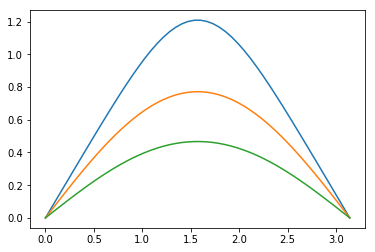

In [4]:
plt.plot(x, u)
plt.plot(x, u2)
plt.plot(x, u3)

Below, I have repeated the same process as above, plotting the approximations to $U_{t}$ at the the same values of $T$ as above, but this time using values that produced $\alpha$ greater than $\frac{1}{2}$. The method is thus unstable, and it becomes immediately apparent in the plots below. 

In [5]:
u4, k4, h4, x4 = finiteDif1(0.1, np.pi, I, 50, 46, 1)
u5, k5, h5, x5 = finiteDif1(0.5, np.pi, I, 50, 240, 1)
u6, k6, h6, x6 = finiteDif1(1.0, np.pi, I, 50, 482, 1)

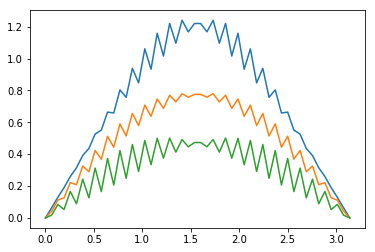

In [6]:
plt.plot(x, u4)
plt.plot(x, u5)
plt.plot(x, u6)

The list below is merely to demonstrate that the $\alpha$'s selected were all greater than $1$

In [7]:
alpha_list2 = [k4/h4**2, k5/h5**2, k6/h6**2]
alpha_list2

[0.5406048042783401, 0.5089375772494833, 0.5057633304059316]

# Problem 2
Consider the backward time difference method $$\frac{u_{j}^{n+1} - u_{j}^{n}}{k} = \sigma \frac{u_{j-1}^{n+1} - 2u_{j}^{n+1} + u_{j+1}^{n+1}}{h^{2}}$$

# Part a)
Do von Neumann analysis to determine the amplification factor $g$ and show that the method is unconditionally stable (no restriction on k,h)


To begin, we will write the method in the form: $$U_{j}^{n} = U_{j}^{n+1} - \alpha \bigg(U_{j-1}^{n+1} - 2U_{j}^{n+1} + U_{j+1}^{n+1}\bigg)$$ Then, performing the substitution $U_{j}^{n} = g^{n}e^{imjh}$: $$g^{n}e^{imjh} = g^{n+1}e^{imjh} - \alpha \bigg(g^{n+1}e^{im(j-1)h} - 2g^{n+1}e^{imjh} + g^{n+1}e^{im(j+1)h}\bigg)$$ Next, we will factor out $g^{n+1}e^{imjh}$, which yields: $$\frac{1}{g} = 1 - \alpha \bigg(e^{-imh} - 2 + e^{imh} \bigg)$$ As we know that $e^{-imh} + e^{imh} = 2cos(mh)$, this can be written as: $$\frac{1}{g} = 1 - \alpha \bigg( 2cos(mh) - 2 \bigg) = 1 - 2\alpha\bigg(cos(mh)-1\bigg)$$ Rearranging yields our computation factor $g$: $$g(m) = \frac{1}{1 - 2\alpha\bigg(cos(mh) - 1 \bigg)},\: \forall m \in \mathbb{Z}^{+}$$ 

To prove stability, we need to determine for what values of $\alpha$  $|g(m)| \leq 1$, which is to say: $$-1 \leq \frac{1}{1 - 2\alpha\bigg(cos(mh) - 1 \bigg)} \leq 1$$ To determine the possible values of $\alpha$, we will use that we know $-1 \leq cos(mh) \leq 1, \: m \in \mathbb{Z}^{+}$ and examine the boundary behavior. If $cos(mh)$ = 1, this yields: $$\frac{1}{1 - 2\alpha (1-1)} = \frac{1}{1} = 1$$ As $-1 \leq 1 \leq 1$, this checks out. Now take $cos(mh) = -1$: $$\frac{1}{1 - 2\alpha(-2)} = \frac{1}{1 + 4\alpha}$$ As $\alpha = \frac{\sigma k}{h^{2}}$, and we know that by definition $\sigma, k, h \gt 0$, $$0 \leq \frac{1}{1 + 4\alpha} \leq 1,\: \forall \alpha$$ Thus, as $|g(m)| \leq 1, \: \forall k,h$, we have proved that this method is unconditionally stable. 

# Part b)
Implement the backward time difference method to solve the heat equation: use a tridiagonal solver, not a full Gaussian elimination solver, and demonstrate the stability of the method for $k = h$ and $\sigma = 1$

In [8]:
# This code was written by Atticus Soane in order to execute the tridiagonal algorithm from the notes.
#It will take four lists or arrays as inputs that represent the three diagonals from the tridiagonal matrix, as well
#as the solution matrix d.
#And it will return a list or array of the x-values that solve the system. 
def triSolver(a, b, c, d):
    n = len(a)
    m = [] #this is an empty list to hold the m-values to be generated
    l = [] #this is an empty list to thold the l-values
    m.append(a[0])
    for j in range(n-1): #this for loop generates the m and l values 
        l.append(c[j] / m[j])
        m.append(a[j+1] - (l[j]* b[j]))
    y = [] #this holds my y-values to perform the Ly = d forward substition 
    y.append(d[0])
    for i in range(1, n): #forward substitution loop
        y.append(d[i] - (l[i-1] * y[i-1]))
    x = [0] * n #this will hold my x-values to perform the Ux = y backwards substitution 
    x[n-1] = y[-1] / m[-1]
    for k in range(n-2, -1, -1): #performs the backwards substitution. 
        x[k] = (y[k] -(b[k] * x[k+1]))/m[k]
    return(x)

In [9]:
#This code was written by Atticus Soane to perform the backward time finite difference method. The inputs are the same
#as the function written above: T, the desired time step to evaluate U_{t} at, L, the upper bound of the range of 
#x-values, I, the function to be used for the initial condition u_{0, x}, M, the number of equispaced nodes of 
#x-values, N, the number of time steps, and sigma (which will just be held constant at 1)
#the output are u, the approximation of U_{t} at the time step, and the x-range to plot the approximation
#because this method is unconditionally stable, there was no need to return k and h because alpha doesn't matter
def finiteDifB(T, L, I, M, N, sigma):
    x = np.linspace(0, L, M) #generates equispaced nodes for x-values
    h = x[1] - x[0] #calculates h value
    t = np.linspace(0, T, N) #generates equispaced time steps 
    k = t[1] - t[0] #calculates k value
    alpha = sigma * k / h**2 #generates alpha
    u = np.zeros(M) #a list of zeros to act as the next time step (represents u^(n+1))
    b = np.zeros(M)
    for m in range(1, M): #sets the initial condition b = u^{n-1} for u^{0}
        b[m] = I(x[m])
    main = np.ones(M) 
    for i in range(1, M-1): #sets the main diagonal for the tridiagonal solver
        main[i] = (1 + 2*alpha)
    upper = np.zeros(M-1)
    for i in range(1, M-1): #sets the upper diagonal 
        upper[i] = (-alpha)
    lower = np.zeros(M-1)
    for i in range(0, M-2): #sets the lower diagonal 
        lower[i] = (-alpha)
    for step in range(N): #solves the system of equations at each time step using the tridiagonal solver
        u = triSolver(main, upper, lower, b)
        for m in range(1, M):
            b[m] = u[m]
    return(u, x) #returns an approximation of u at the given time increment 
    

As was stated in the problem, we will take $k = h$. To do this, as we know $h = \frac{L}{M}$, and $L = \pi$, we will hold $M$ constant at $M = 100$ which means that $h = \frac{\pi}{100} \approx 0.03141592653$. As with the previous problem, we will evaluate at three different times: $T = 0.1, 0.5, 1.0$ and thus to keep $k$ as close as possible to $h$, we will select the time steps $k =4, 16, 32$ for $T = 0.1, 0.5, 1.0$ respectively. These values were chosen as the closest integer values $N$ to $k = \frac{T}{N}$ such that $k = h$. $\sigma$ will be held constant at $1$.

In [10]:
u_new1, x_new1 = finiteDifB(0.1, np.pi, I, 100, 4, 1)
u_new2, x_new2 = finiteDifB(0.5, np.pi, I, 100, 16, 1)
u_new3, x_new3 = finiteDifB(1, np.pi, I, 100, 32, 1)

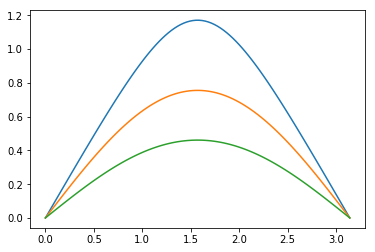

In [11]:
plt.plot(x_new1, u_new1)
plt.plot(x_new2, u_new2)
plt.plot(x_new3, u_new3)